In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import seaborn as sns

In [ ]:
url='https://raw.githubusercontent.com/digipodium/Datasets/main/regression/house_pricing.csv'
df=pd.read_csv(url)
df.head()

feature analysis and selection


In [ ]:
# relation between area and price
plt.scatter(df.SquareFeet, df.Price)

In [ ]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(df[['SquareFeet']],df.Price)
pred = model.predict(df[['SquareFeet',]])
plt.scatter(df.SquareFeet,pred,color='red')
#Pearson Correlation
pc=df.SquareFeet.corr(df.Price)
print('Pearson Correlation:',pc)

# Pearson Correlation Coefficient
- If value close to 1, strong positive correlation
- If value close to -1, strong negative corrlation 
- If value close to 0, no correlation

In [ ]:
df.select_dtypes(include='number').corrwith(df.Price)

In [ ]:
num_cols = df.select_dtypes(include='number').columns
for col in num_cols:
    plt.scatter(df[col],df.Price)
    plt.title(col)
    model = LinearRegression()
    model.fit(df[[col]],df.Price)
    plt.plot(df[col],model.predict(df[[col]]),color='red')
    plt.show()

for categorical independent variable with numerical target
 - boxplot analysis(visual)
 - anova test
    - null hypothesis: means of the group are equal 
    - if p-value < 0.05, reject null hypothesis 
    - if p-value > 0.05, fail to reject null hypothesis         

In [ ]:
df.columns

In [ ]:
cat_cols = ['Beds','Baths','City','Type']
for col in cat_cols:
    df.boxplot(column='Price',by=col,grid=False)
    plt.title(col)

# testing with anova

- for each feature, calculate the f- stastistic and p- value
- if p-value < 0.05, reject null hypothesis(means the columns is important)
- if p-value > 0.05,  fail to reject null hypothesis(means the columns is not important)

In [ ]:
selected_cols=['SquareFeet','Beds','Baths','Type']
X = df[selected_cols]
y=df.Price

In [ ]:
X['Type'].value_counts()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [ ]:
X.head()

In [ ]:
num_cols = X.select_dtypes(include='number').columns
cat_cols=X.select_dtypes(include='object').columns
num_pipe=Pipeline([
    ('scaler',StandardScaler())
])
cat_pipe = Pipeline([
    ('onehot',OneHotEncoder())
])
preprocessor = ColumnTransformer([
    ('num',num_pipe,num_cols),
    ('cat',cat_pipe,cat_cols)
])
model = Pipeline([
    ('pre',preprocessor),
    ('lr',LinearRegression())
])
model

evaluating the training and testing performance of a model

In [ ]:
from sklearn.model_selection import learning_curve, cross_val_score
train_sizes = [.1,.2,.3,.4,.5,.6,.7,.8,.9]
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, 
                                                        train_sizes=train_sizes)
#   print(train_sizes)
#   print(train_scores.mean(axis=1))
#   print(test_scores.mean (axis=1))

#plot learning curve
plt.plot(train_sizes,train_scores.mean(axis=1),label='Train',marker='o')
plt.plot(train_sizes,test_scores.mean(axis=1),label='Test',marker='o')
plt.legend()
plt.show()

In [ ]:
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.2)
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
print("Training Results")
print("MSE:",mean_squared_error(y_train, y_train_pred))
print("MAE:", mean_absolute_error(y_train,y_train_pred))
print("R2:",r2_score(y_train,y_train_pred))
print('-'*50)
print('Testing Results')
print("MSE:",mean_squared_error(y_test, y_test_pred))
print("MAE:", mean_absolute_error(y_test,y_test_pred))
print("R2:",r2_score(y_test,y_test_pred))

Model persistance

In [ ]:
import joblib
import os
# create a directory to save models
os.makedirs(os.path.join(os.getcwd(),'models'),exist_ok=True)
# save model - dumping
path = os.path.join(os.getcwd(),'models','house_price_model')
joblib.dump(model,path)

loading a saved model

In [ ]:
path = os.path.join(os.getcwd(),'models','house_price_model')
model = joblib.load(path)
model

making predictions with a model

In [ ]:
# very simple example data
print(model.predict(X.head()))

In [ ]:
X.Type.unique().tolist()

In [ ]:
X.columns.tolist()

In [ ]:
# manual data input
inpX = pd.DataFrame({
    'SquareFeet': [2000],
    'Beds': [3],
    'Baths': [2],
    'Type': ['Condo']
})
result = model.predict(inpX)
print(*result, sep ='\n')

making a decision tree model , to check the updated memory

In [57]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

In [ ]:
model2 = Pipeline([
    ('pre',preprocessor),
    ('dt',DecisionTreeRegressor())
])
model2.fit(X_train,y_train)
y_train_pred = model2.predict(X_train)
y_test_pred = model2.predict(X_test)

print("Training Results")
print("MSE:",mean_squared_error(y_train, y_train_pred))
print("MAE:", mean_absolute_error(y_train,y_train_pred))
print("R2:",r2_score(y_train,y_train_pred))
print('-'*50)
print('Testing Results')
print("MSE:",mean_squared_error(y_test, y_test_pred))
print("MAE:", mean_absolute_error(y_test,y_test_pred))
print("R2:",r2_score(y_test,y_test_pred))

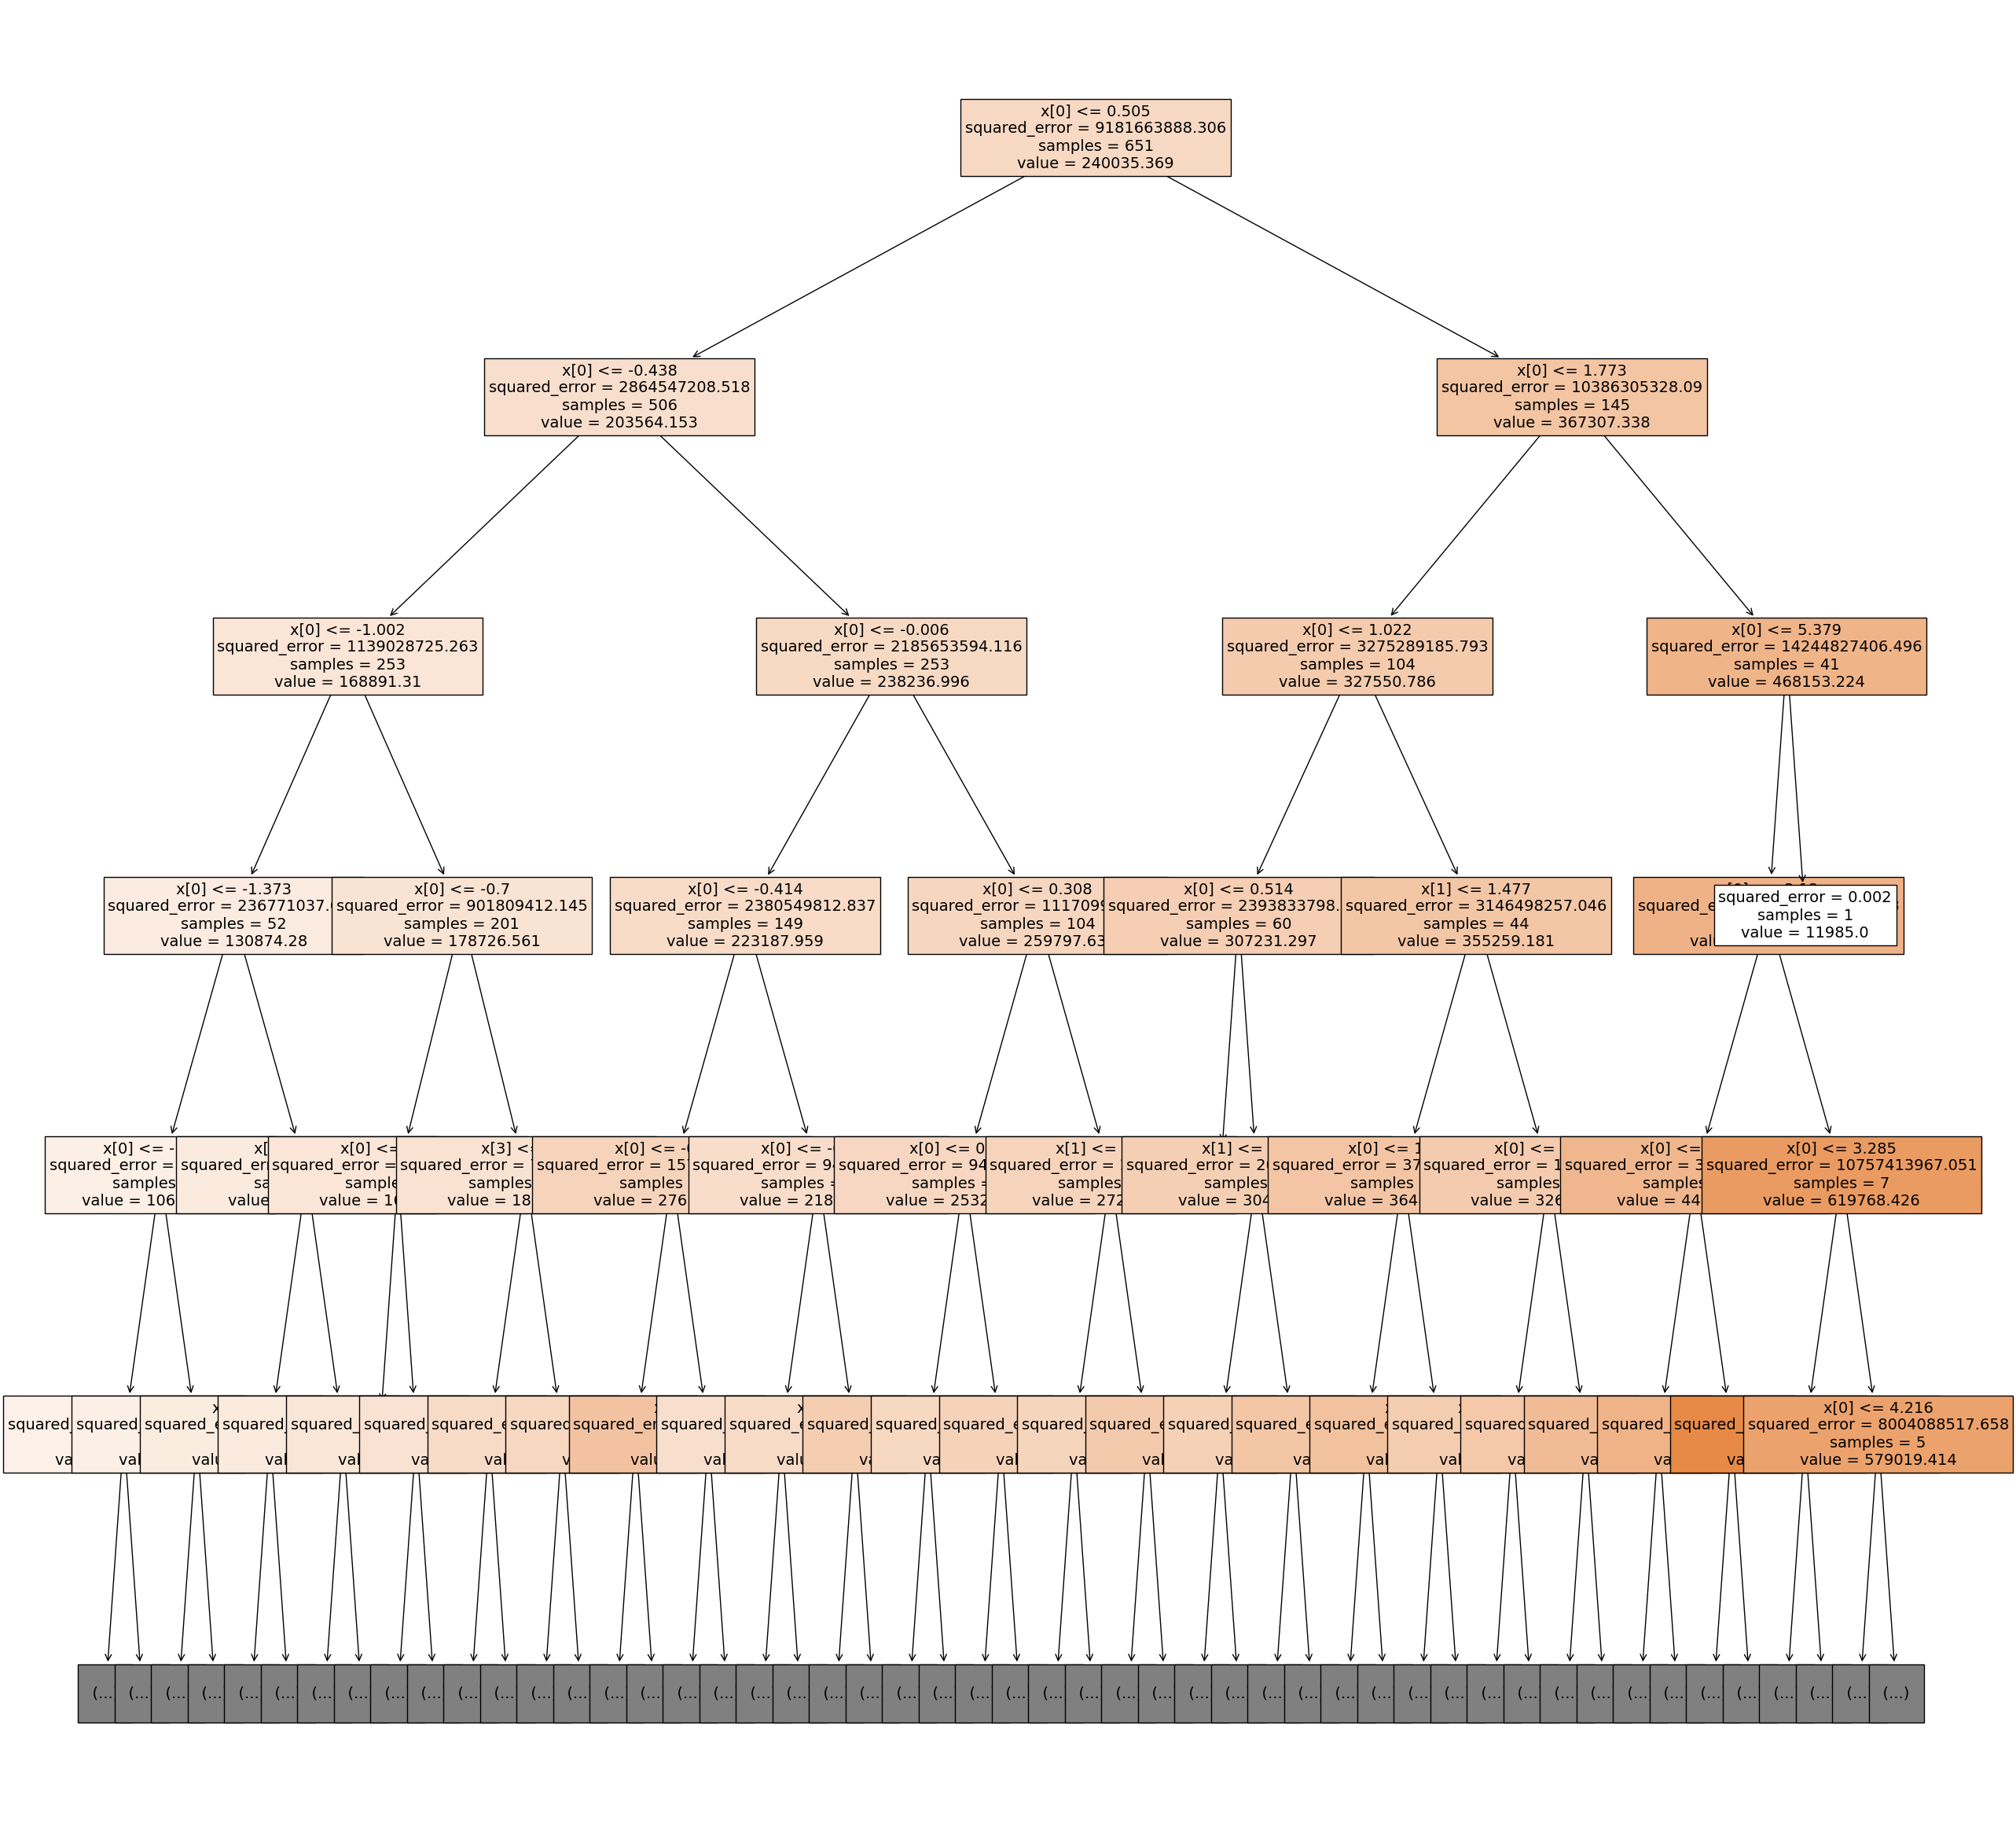

In [59]:
fig = plt.figure(figsize=(30,30))
_= plot_tree(
    model2.named_steps['dt'],
    filled=True,
    max_depth=5,
    fontsize=14
)